In [96]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw

pd.set_option('display.max_rows', None)

In [97]:
from build_dataframe import build_ball_flight_df, build_summary_dict, build_bat_path_df

In [99]:
with open('../data/12345645_36716.jsonl') as f:
    json_file_1 = json.load(f)
path_1 = build_bat_path_df(json_file_1)

In [101]:
with open('../data/12345636_46490.jsonl') as f:
    json_file_2 = json.load(f)
path_2 = build_bat_path_df(json_file_2)

In [103]:
with open('../data/12345634_18456.jsonl') as f:
    json_file_3 = json.load(f)
path_3 = build_bat_path_df(json_file_3)

In [104]:
path_1.head()

,event,time,head_pos_0,head_pos_1,head_pos_2,handle_pos_0,handle_pos_1,handle_pos_2
0,First,-0.374020,-4.136137,-1.278180,4.917113,-1.464757,-1.720809,4.628900
1,no_event,-0.370751,-4.131165,-1.275709,4.928485,-1.464797,-1.738894,4.626497
2,no_event,-0.367418,-4.126033,-1.273219,4.939728,-1.464754,-1.755497,4.623088
3,no_event,-0.364085,-4.120818,-1.270763,4.950629,-1.464587,-1.770183,4.618553
4,no_event,-0.360751,-4.115436,-1.268322,4.961246,-1.464251,-1.782807,4.612271


In [105]:
path_2.head()

,event,time,head_pos_0,head_pos_1,head_pos_2,handle_pos_0,handle_pos_1,handle_pos_2
0,First,-0.367833,-2.087495,-1.929484,5.785013,-1.275699,-0.278937,3.777044
1,no_event,-0.364500,-2.011788,-1.926791,5.776146,-1.295729,-0.253666,3.750518
2,no_event,-0.361167,-1.937665,-1.921224,5.766673,-1.313816,-0.229983,3.725651
3,no_event,-0.357835,-1.865103,-1.912656,5.756568,-1.329708,-0.207672,3.701904
4,no_event,-0.354502,-1.794036,-1.901019,5.745851,-1.343154,-0.186342,3.679007


In [106]:
# I want to pick a section of the data frame that represents the swing
# Each swing has a "Hit" or "Nearest" event tag. 
# If this is considered the middle of the swing, let's take 75 points before and after

In [107]:
def filter_path(path_df):
    mid_index = path_df.index[path_df.event.isin(['Hit', 'Nearest'])].to_list()
    start_index = mid_index[0] - 75
    end_index = mid_index[0] + 75
    return path_df[start_index:end_index]
filter_path_1 = filter_path(path_1)
filter_path_2 = filter_path(path_2)
filter_path_3 = filter_path(path_3)

In [108]:
# I want to normalize the swings so that each point is relative to the start
# This will avoid variability that may be introduced from the batter standing in a different
# position

In [109]:
filter_path_1.head()

,event,time,head_pos_0,head_pos_1,head_pos_2,handle_pos_0,handle_pos_1,handle_pos_2
176,no_event,0.212539,-3.990557,-0.754743,5.464849,-1.736438,-2.031273,4.625398
177,no_event,0.215872,-3.995323,-0.759182,5.467371,-1.743503,-2.036920,4.623599
178,no_event,0.219205,-3.999980,-0.764594,5.469580,-1.748409,-2.038973,4.620082
179,no_event,0.222538,-4.004995,-0.771482,5.471375,-1.750588,-2.035859,4.614488
180,no_event,0.225871,-4.010637,-0.779383,5.473245,-1.750967,-2.027796,4.606864


In [110]:
def normalize_path(path):
    pos_columns = ['head_pos_0', 'head_pos_1', 'head_pos_2',
                   'handle_pos_0', 'handle_pos_1', 'handle_pos_2']
    return path[pos_columns] - path[pos_columns].iloc[0]
normalized_path_1 = normalize_path(filter_path_1)
normalized_path_2 = normalize_path(filter_path_2)
normalized_path_3 = normalize_path(filter_path_3)

In [111]:
def combine_coordinates(df):
    return df[['head_pos_0', 'head_pos_1', 'head_pos_2',
               'handle_pos_0', 'handle_pos_1', 'handle_pos_2'
              ]].values
sequence1 = combine_coordinates(normalized_path_1)
sequence2 = combine_coordinates(normalized_path_2)
sequence3 = combine_coordinates(normalized_path_3)

In [112]:
def calculate_dtw_distance(df1, df2):
    """
    Calculates the DTW distance between two dataframes by computing the DTW distance for each coordinate separately.
    
    :param df1: First dataframe.
    :param df2: Second dataframe.
    :return: Aggregated DTW distance.
    """
    coordinates = ['head_pos_0', 'head_pos_1', 'head_pos_2',
                   'handle_pos_0', 'handle_pos_1', 'handle_pos_2']
    total_distance = 0.0
    
    for coordinate in coordinates:
        seq1 = df1[coordinate].values
        seq2 = df2[coordinate].values
        distance = dtw.distance(seq1, seq2)
        total_distance += distance
    
    return total_distance

# Calculate DTW distance
distance = calculate_dtw_distance(normalized_path_1, normalized_path_2)
print(f"DTW Distance between the swings: {distance}")

distance = calculate_dtw_distance(normalized_path_1, normalized_path_3)
print(f"DTW Distance between the swings: {distance}")

distance = calculate_dtw_distance(normalized_path_2, normalized_path_3)
print(f"DTW Distance between the swings: {distance}")

DTW Distance between the swings: 111.75609243283616
DTW Distance between the swings: 12.256572593888421
DTW Distance between the swings: 111.7213906359926


In [133]:
def vis_distance(df_1, df_2, pos):
    seq1 = df_1[pos].values
    seq2 = df_2[pos].values
    alignment_path = dtw.warping_path(seq1, seq2)
    
    plt.figure(figsize=(12, 6))
    plt.plot(seq1, label=f'Swing 1 {pos}')
    plt.plot(seq2, label=f'Swing 2 {pos}')
    for (i, j) in alignment_path:
        plt.plot([i, j], [seq1[i], seq2[j]], 'k-', alpha=0.5)
    plt.text(10, 3, "A", fontsize=100, color='orange')

    plt.legend()
    plt.show()

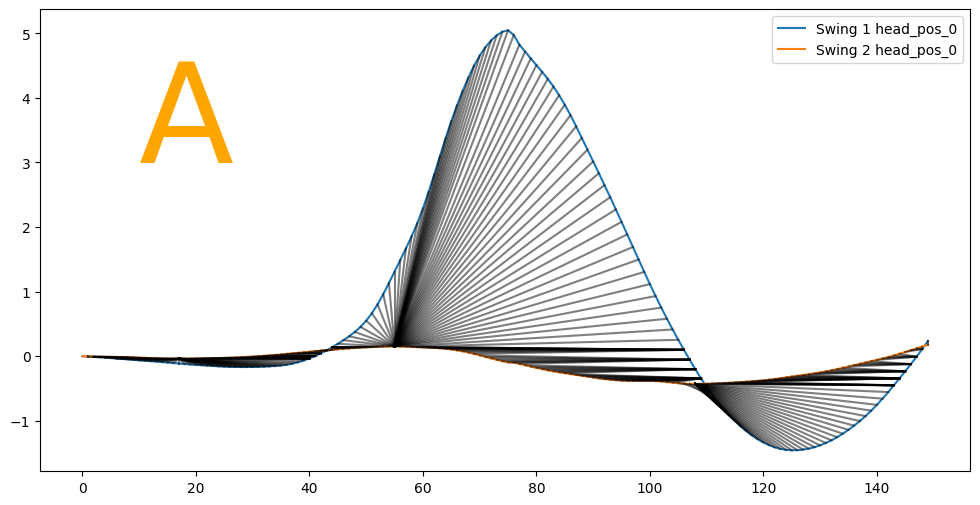

In [134]:
vis_distance(normalized_path_1, normalized_path_2, 'head_pos_0')

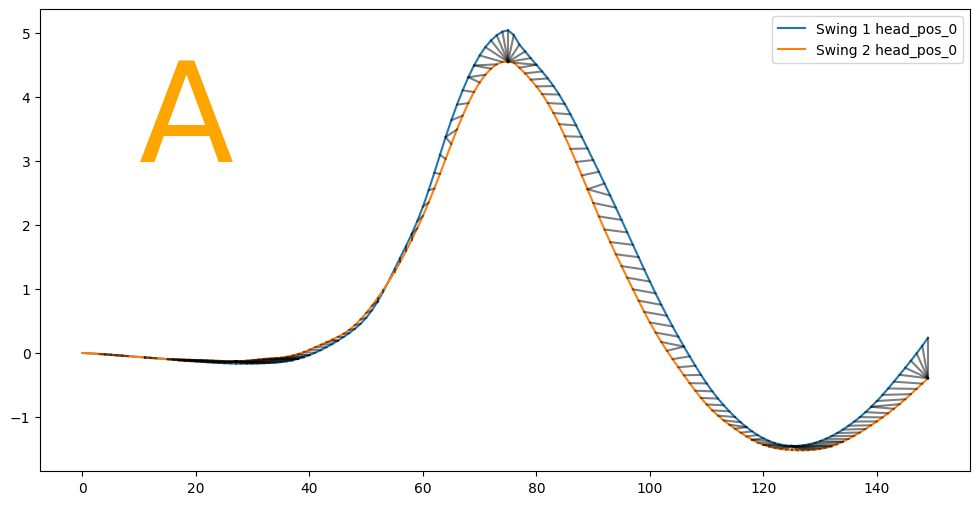

In [135]:
vis_distance(normalized_path_1, normalized_path_3, 'head_pos_0')

# Make the distance metrics into a grade
- calculate mean and std
- determine how many swings are more than 2 std from the mean
- A = 0%
- B < 5%
- C < 10%
- D < 15%
- F > 15%

In [90]:
def get_grade(distance, thresholds):
    if distance == thresholds['A']:
        return 'A'
    elif distance > thresholds['B']:
        return 'B'
    elif distance > thresholds['C']:
        return 'C'
    elif distance > thresholds['D']:
        return 'D'
    else:
        return 'F'

In [94]:
distance_df = pd.read_csv('distance_metrics_df.csv')
batters = distance_df.batter.unique()
scorecard_list = []
for batter in batters:
    scorecard_dict = dict()
    scorecard_dict['Batter'] = batter
    batter_df = distance_df[distance_df['batter'] == batter]
    min_dist = np.mean(batter_df['distance']) - 2 * np.std(batter_df['distance'])
    max_dist = np.mean(batter_df['distance']) + 2 * np.std(batter_df['distance'])
    swing_count = len(batter_df)
    good_count = len(batter_df[
                     (batter_df['distance'] < max_dist)
                     &
                     (batter_df['distance'] > min_dist)
                     ])
    scorecard_dict['swing_count'] = swing_count
    scorecard_dict['dist_score'] = good_count/swing_count
    distance_thresholds = {'A': 1, 'B': 0.95, 'C': 0.9, 'D': 0.85}
    scorecard_dict['dist_grade'] = get_grade(good_count/swing_count, distance_thresholds)
    scorecard_list.append(scorecard_dict)

In [95]:
pd.DataFrame.from_dict(scorecard_list)

,Batter,swing_count,dist_score,dist_grade
0,172804761,10,0.900000,D
1,174158975,13,1.000000,A
2,223971350,5,1.000000,A
3,290569727,9,0.888889,D
4,352830460,18,0.944444,C
5,360906992,14,1.000000,A
6,412098649,17,0.941176,C
7,432216743,5,1.000000,A
8,451871192,11,1.000000,A
9,459722179,19,0.947368,C


,Unnamed: 0,file,batter,batter_count,distance
272,272,anonymized-files-wisd/12345634_10282.jsonl,797796542,0,0.0
